In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Connect to (or create) a database
conn = sqlite3.connect("sales_data.db")

# Create a cursor to execute SQL
cursor = conn.cursor()


In [3]:
# Create sales table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")


In [5]:
# Sample sales data
sample_data = [
    ("Apple", 10, 2.5),
    ("Banana", 15, 1.2),
    ("Orange", 7, 3.0),
    ("Apple", 5, 2.5),
    ("Banana", 10, 1.2),
    ("Mango", 12, 2.8)
]

# Insert data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Save (commit) changes
conn.commit()


In [6]:
# Sample sales data
sample_data = [
    ("Apple", 10, 2.5),
    ("Banana", 15, 1.2),
    ("Orange", 7, 3.0),
    ("Apple", 5, 2.5),
    ("Banana", 10, 1.2),
    ("Mango", 12, 2.8)
]

# Insert data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Save (commit) changes
conn.commit()


In [7]:
# SQL to calculate total quantity and revenue per product
query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product
"""

# Load result into pandas DataFrame
df = pd.read_sql_query(query, conn)


In [8]:
print("Sales Summary:")
print(df)

Sales Summary:
  product  total_qty  revenue
0   Apple         45    112.5
1  Banana         75     90.0
2   Mango         36    100.8
3  Orange         21     63.0


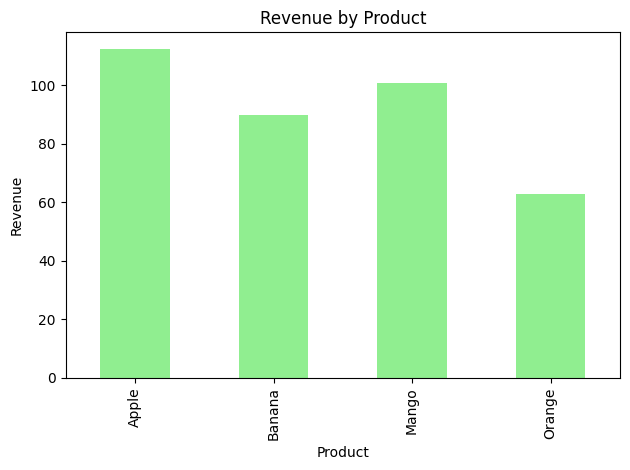

In [9]:
# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='lightgreen')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# Save and Show Chart
plt.savefig("sales_chart.png")
plt.show()


In [10]:
conn.close()
